## 1.Importing libraries 

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('./cardio_train1.csv')
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


## Data Cleaning

In [3]:
# There were some rows with rediculous numbers or so bias, which can misjudge analysis and prediction model. 
data['age'] = (data['age'] / 365).astype(int)
data = data.drop(columns=['id'])
data = data[data['ap_hi'] <= 300]
data = data[data['ap_lo'] <= 300]
data = data[data['height'] >= 130]
data = data[data['weight'] >= 30]

In [4]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


# Step 3: Data Preprocessing

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
                age        gender        height        weight         ap_hi  \
count  68911.000000  68911.000000  68911.000000  68911.000000  68911.000000   
mean      52.828155      1.348682    164.440829     74.111780    126.302434   
std        6.769511      0.476556      7.855705     14.286127     17.878112   
min       29.000000      1.000000    130.000000     30.000000   -150.000000   
25%       48.000000      1.000000    159.000000     65.000000    120.000000   
50%       53.000000      1.000000    165.000000     72.000000    120.000000   
75%       58.000000      2.000000    170.000000     82.000000    140.000000   
max       64.000000      2.000000    250.000000    200.000000    240.000000   

              ap_lo   cholesterol          gluc         smoke          

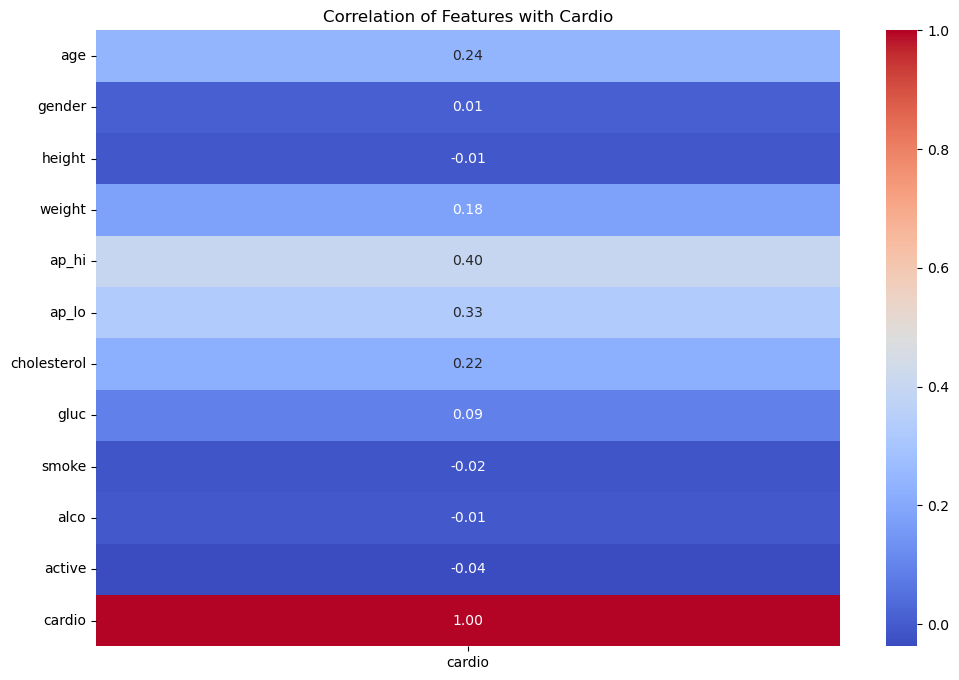

Top {} features with the highest correlation:
cardio         1.000000
ap_hi          0.397687
ap_lo          0.328229
age            0.239562
cholesterol    0.221395
Name: cardio, dtype: float64

Bottom {} features with the lowest correlation:
active    0.037273
smoke     0.016320
height    0.011795
alco      0.007888
gender    0.007565
Name: cardio, dtype: float64


In [5]:
# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Compute the correlation matrix
corr_matrix = data.corr()
# Extract correlation of features with 'cardio' column
corr_with_cardio = corr_matrix['cardio']

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_with_cardio.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with Cardio')
plt.show()
# Sort the correlation values with 'cardio' in descending order
sorted_corr_with_cardio = corr_with_cardio.abs().sort_values(ascending=False)

# Display the top and bottom N features with the highest correlations
N = 5  # Number of features to display

top_features = sorted_corr_with_cardio.head(N)
bottom_features = sorted_corr_with_cardio.tail(N)

print("Top {} features with the highest correlation:")
print(top_features)

print("\nBottom {} features with the lowest correlation:")
print(bottom_features)

## Step 4: Data Analysis

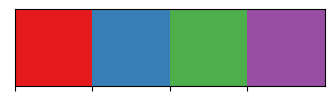

In [6]:
custom_palette = sns.color_palette("Set1", 4)
sns.palplot(custom_palette)
sns.set_palette(custom_palette)

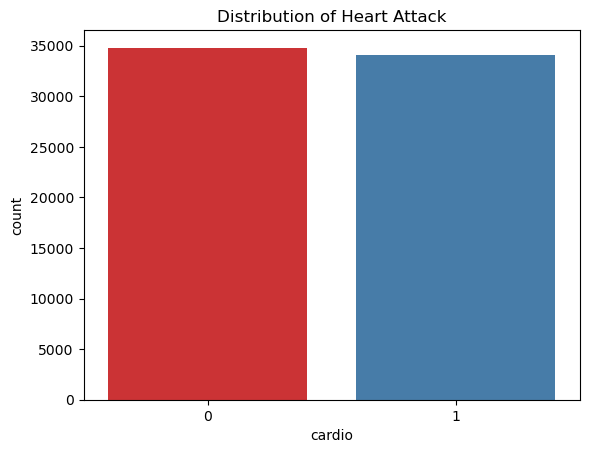

In [7]:
sns.countplot(x='cardio', data=data)
plt.title('Distribution of Heart Attack')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

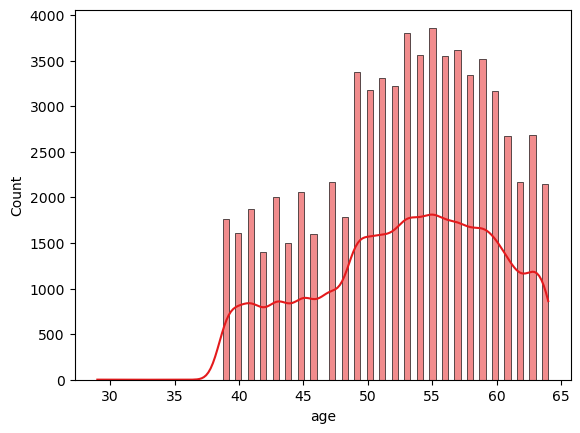

In [8]:
sns.histplot(data=data, x="age", kde=True)

<AxesSubplot:xlabel='height', ylabel='Count'>

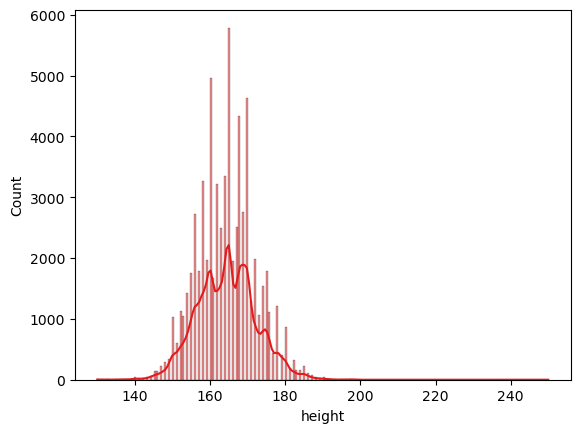

In [9]:
sns.histplot(data=data, x="height", kde=True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

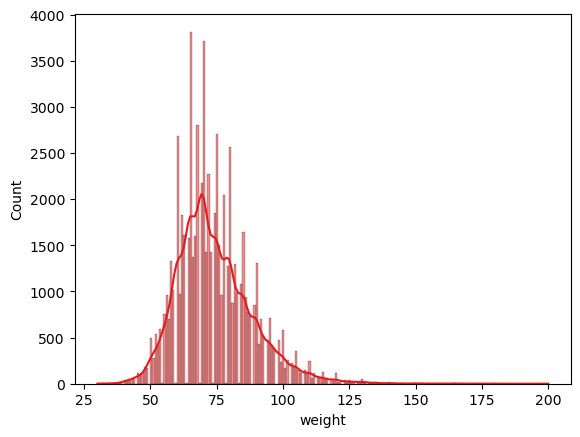

In [10]:
sns.histplot(data=data, x="weight", kde=True)

## Step5: Model Building

In [11]:
## Split the data into features (X) and target variable (y)
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [12]:
## Standardize features
mms = MinMaxScaler()
X = mms.fit_transform(X)
X


array([[0.6       , 1.        , 0.31666667, ..., 0.        , 0.        ,
        1.        ],
       [0.74285714, 0.        , 0.21666667, ..., 0.        , 0.        ,
        1.        ],
       [0.62857143, 0.        , 0.29166667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65714286, 1.        , 0.44166667, ..., 0.        , 1.        ,
        0.        ],
       [0.91428571, 0.        , 0.275     , ..., 0.        , 0.        ,
        0.        ],
       [0.77142857, 0.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ]])

In [13]:
## Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=33123)

In [14]:
y = pd.get_dummies(y)
y

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
69995,1,0
69996,0,1
69997,0,1
69998,0,1


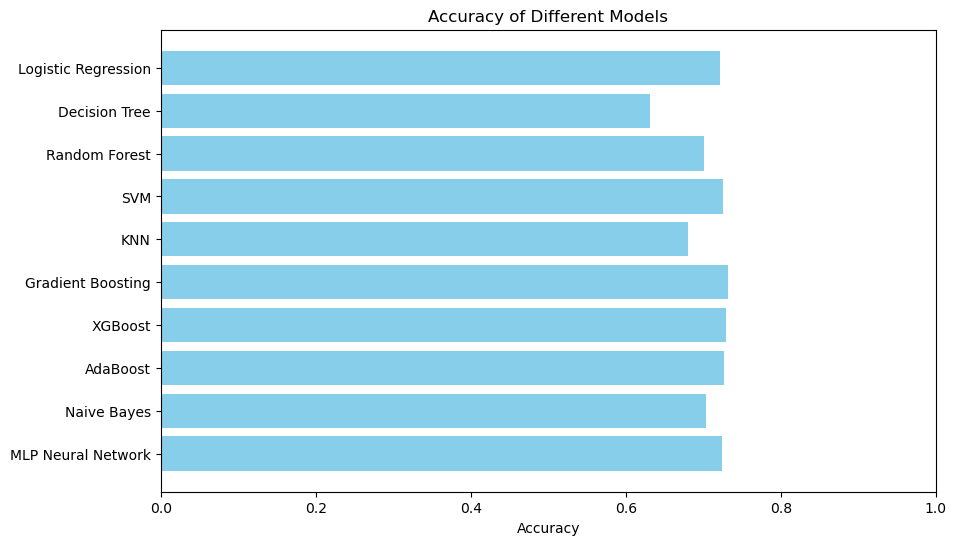

In [15]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33123)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11,activation='relu',input_shape=(11,)),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [19]:
model.compile(optimizer=tf.optimizers.Adam(0.001),loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [20]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=800)

Epoch 1/100


C:\Users\khashayar\anaconda3\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


65/65 [==============================] - 1s 7ms/step - loss: 0.6695 - categorical_accuracy: 0.5851 - val_loss: 0.6502 - val_categorical_accuracy: 0.6024
Epoch 2/100
29/65 [============>.................] - ETA: 0s - loss: 0.6431 - categorical_accuracy: 0.6244

C:\Users\khashayar\anaconda3\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


65/65 [==============================] - 0s 3ms/step - loss: 0.6387 - categorical_accuracy: 0.6289 - val_loss: 0.6303 - val_categorical_accuracy: 0.6396
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.6221 - categorical_accuracy: 0.6527 - val_loss: 0.6140 - val_categorical_accuracy: 0.6665
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 0.6060 - categorical_accuracy: 0.6789 - val_loss: 0.6001 - val_categorical_accuracy: 0.6825
Epoch 5/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5958 - categorical_accuracy: 0.6899 - val_loss: 0.5935 - val_categorical_accuracy: 0.6901
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.5892 - categorical_accuracy: 0.6977 - val_loss: 0.5876 - val_categorical_accuracy: 0.6971
Epoch 7/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5844 - categorical_accuracy: 0.7037 - val_loss: 0.5833 - val_categorical_accuracy: 0.7000
Epoch 8/100
65/65 [===

65/65 [==============================] - 0s 6ms/step - loss: 0.5459 - categorical_accuracy: 0.7325 - val_loss: 0.5537 - val_categorical_accuracy: 0.7225
Epoch 52/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5453 - categorical_accuracy: 0.7336 - val_loss: 0.5512 - val_categorical_accuracy: 0.7281
Epoch 53/100
65/65 [==============================] - 0s 4ms/step - loss: 0.5454 - categorical_accuracy: 0.7326 - val_loss: 0.5514 - val_categorical_accuracy: 0.7272
Epoch 54/100
65/65 [==============================] - 0s 5ms/step - loss: 0.5457 - categorical_accuracy: 0.7313 - val_loss: 0.5522 - val_categorical_accuracy: 0.7244
Epoch 55/100
65/65 [==============================] - 0s 5ms/step - loss: 0.5449 - categorical_accuracy: 0.7321 - val_loss: 0.5507 - val_categorical_accuracy: 0.7289
Epoch 56/100
65/65 [==============================] - 0s 3ms/step - loss: 0.5444 - categorical_accuracy: 0.7328 - val_loss: 0.5503 - val_categorical_accuracy: 0.7282
Epoch 57/100
65/6

65/65 [==============================] - 0s 6ms/step - loss: 0.5412 - categorical_accuracy: 0.7350 - val_loss: 0.5498 - val_categorical_accuracy: 0.7250


In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {accuracy}')

539/539 [==============================] - 1s 993us/step - loss: 0.5498 - categorical_accuracy: 0.7250
Test accuracy: 0.7249825596809387
